<h1 style="
    font-size: 40px; 
    font-family: Arial, sans-serif;
    color: #ffffff; 
    background: linear-gradient(to right, #8E0E00, #1F1C18);
    text-align: center; 
    padding: 15px; 
    border-radius: 10px; 
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-transform: uppercase;
    letter-spacing: 1px;
    font-weight: bold;">
    <img src="netflix.png">
</h1>

<h1 style="
    font-size: 40px; 
    font-family: 'Garamond', serif; 
    color: #ffffff; 
    background: linear-gradient(to right, #8E0E00, #1F1C18);
    text-align: center; 
    padding: 15px; 
    border-radius: 10px; 
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    Exploration Dataset Netflix
</h1>


<h1 style="color: #8E0E00">
    Context
</h1>

Netflix adalah salah satu platform media dan streaming video yang paling populer. Mereka memiliki lebih dari 8.000 film atau acara TV yang tersedia di platform mereka. Hingga pertengahan tahun 2024, mereka memiliki lebih dari 282 juta pelanggan secara global. Dataset tabular ini terdiri dari daftar semua film dan acara TV yang tersedia di Netflix, beserta rincian seperti - pemeran, sutradara, peringkat, tahun rilis, durasi, dan lainnya.

<img src="home_screen.jpeg">

<h1 style="
    font-size: 40px; 
    font-family: 'Garamond', serif; 
    color: #ffffff; 
    background: linear-gradient(to right, #8E0E00, #1F1C18);
    text-align: center; 
    padding: 15px; 
    border-radius: 10px; 
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    Import the Necessary Libraries
</h1>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

# Settings and configurations
import warnings
warnings.filterwarnings('ignore')

# Pandas display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

<h1 style="
    font-size: 40px; 
    font-family: 'Garamond', serif; 
    color: #ffffff; 
    background: linear-gradient(to right, #8E0E00, #1F1C18);
    text-align: center; 
    padding: 15px; 
    border-radius: 10px; 
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    Data Collection
</h1>


In [2]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h1 
    style="color: #8E0E00;
    font-size: 25px; 
    text-align: center; ">
    Shape Of Data
</h1>

In [3]:
# Get the shape of Concrete data
df.shape

(8807, 12)

In [4]:
print("Number of rows = {0} and Number of Columns = {1} in Data frame".format(df.shape[0],df.shape[1]))

Number of rows = 8807 and Number of Columns = 12 in Data frame


<h1 
    style="color: #8E0E00;
    font-size: 25px; 
    text-align: center; ">
    Data type of each attribute
</h1>

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<h1>Deskripsi Dataset Netflix</h1>
<p>Dataset ini berisi 8.807 baris dan 12 kolom dengan berbagai informasi tentang judul-judul di Netflix.</p>

<h2>Kolom-kolom Dataset:</h2>
<ul>
    <li><strong>show_id</strong>: ID unik untuk setiap tayangan.</li>
    <li><strong>type</strong>: Jenis tayangan (Movie atau TV Show).</li>
    <li><strong>title</strong>: Judul tayangan.</li>
    <li><strong>director</strong>: Nama sutradara. (Banyak nilai yang hilang)</li>
    <li><strong>cast</strong>: Daftar pemeran. (Beberapa nilai hilang)</li>
    <li><strong>country</strong>: Negara produksi. (Beberapa nilai hilang)</li>
    <li><strong>date_added</strong>: Tanggal tayangan ditambahkan ke Netflix.</li>
    <li><strong>release_year</strong>: Tahun rilis tayangan.</li>
    <li><strong>rating</strong>: Klasifikasi usia.</li>
    <li><strong>duration</strong>: Durasi film atau jumlah musim untuk TV Show.</li>
    <li><strong>listed_in</strong>: Kategori tayangan.</li>
    <li><strong>description</strong>: Ringkasan singkat tentang tayangan.</li>
</ul>

<h2>Nilai yang Hilang:</h2>
<ul>
    <li>Kolom <strong>director</strong> memiliki banyak nilai kosong.</li>
    <li>Kolom <strong>cast</strong> dan <strong>country</strong> juga memiliki beberapa nilai yang hilang.</li>
    <li>Kolom <strong>date_added</strong>, <strong>rating</strong>, dan <strong>duration</strong> juga terdapat nilai yang hilang.</li>
</ul>

<h1 style="
    font-size: 40px; 
    font-family: 'Garamond', serif; 
    color: #ffffff; 
    background: linear-gradient(to right, #8E0E00, #1F1C18);
    text-align: center; 
    padding: 15px; 
    border-radius: 10px; 
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    Preprocessing Data 
</h1>


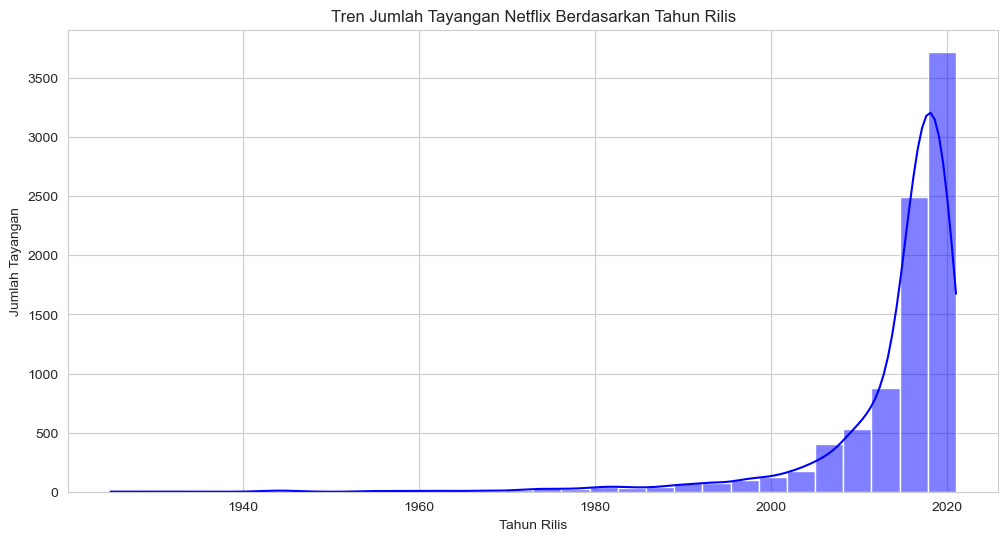

In [7]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# 1. Tren jumlah tayangan berdasarkan tahun rilis
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Tayangan")
plt.title("Tren Jumlah Tayangan Netflix Berdasarkan Tahun Rilis")
plt.show()


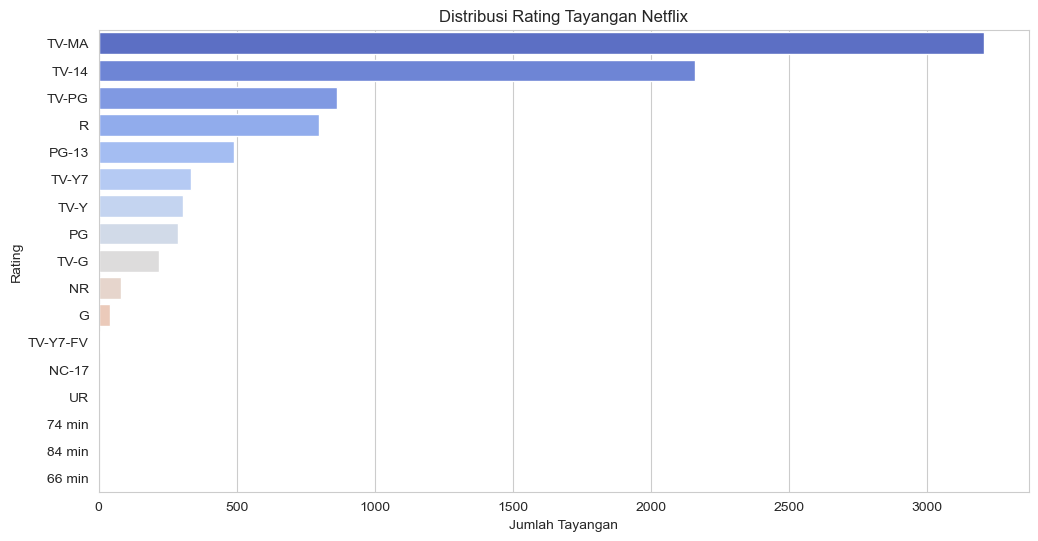

In [8]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# 2. Distribusi rating
plt.figure(figsize=(12, 6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette="coolwarm")
plt.xlabel("Jumlah Tayangan")
plt.ylabel("Rating")
plt.title("Distribusi Rating Tayangan Netflix")
plt.show()

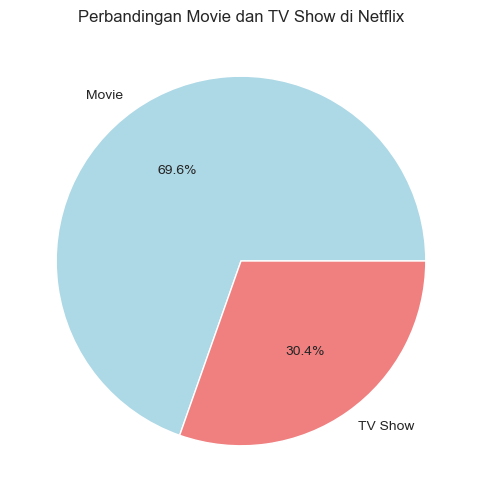

In [9]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# 3. Perbandingan antara Movie dan TV Show
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "lightcoral"])
plt.title("Perbandingan Movie dan TV Show di Netflix")
plt.ylabel("")
plt.show()